# Aula 3 - Aprendizagem não-supervisionada & k-means

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Aprendizagem não-supervisionada
- 2) K-means
- 3) Exemplo real

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ml_utils import *

____
____
_____

## 1) Aprendizagem não-supervisionada

Chegamos ao nosso último tópico do módulo: **aprendizagem não-supervisionada (unsurpervised learning)**.

Este tipo de aprendizagem se diferencia da aprendizagem supervisionada de modo muito simples: **os targets não fazem parte da base de dados!**

> Na aprendizagem não-supervisionada, temos acesso apenas ao conjunto de features, $\{\vec{x}_i\}_{i=1}^N$

A perda que temos com relação à aprendizagem supervisionada é gigante: sem os targets, torna-se impossível a estimação do processo teórico $\mathcal{F}$ que gerou os dados!

Assim, o máximo que podemos fazer na aprendizagem não-supervisionada é a **determinação de estrutura nos dados**:

<img src=https://www.researchgate.net/profile/Zhenyu-Wen-2/publication/336642133/figure/fig3/AS:815304842170368@1571395230317/Examples-of-Supervised-Learning-Linear-Regression-and-Unsupervised-Learning.png width=500>

Em um problema de classificação, somos capazes de encontrar a fronteira de decisão dentre as classes que **são conhecidas no treino**:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/f29c8ebf-dd5f-4fce-99bb-86ec8af21f51.PNG width=700>

Já em com dados não-supervisionados, o máximo que podemos fazer é encontrar a estrutura presente nos dados (e com maior dificuldade!)

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/0c7b530d-e74b-4886-9601-740d054aa166.PNG width=300>

Para muitas aplicações, isso já é suficiente: basta saber que os dados estão estruturados (agrupados/segmentados), sendo o significado de cada grupo/segmento de menor interesse, ou facilmente estimado de outra forma; ou, então, determinar aspectos importantes das features por si só, sem qualquer preocupação com o target.

Neste curso, veremos dois grandes grupos de **técnicas não-supervisionadas**:

- Clusterização - forma de encontrar grupos (clusters) nos dados;
- Redução de dimensionalidade - importante processo de pré-processamento que visa reduzir o número de dimensões (features) de um dataset.

Na aula de hoje, veremos técnicas de clusterização!

______

### Clusterização

Este tipo de problema consiste em __agrupar__ itens semelhantes, isto é, criar __grupos__ (ou __clusters__) de observações que são parecidas entre si (no que diz respeito às features).

> O objetivo central é **dividir os dados em grupos distintos**, tais que **membros de cada grupo sejam similares entre si**

Problemas como estes podem aparecer em diversos contextos:

- Identificação de tipos de clientes parecidos, para o direcionamento de marketing;
- Agrupamento de cidades próximas para melhor logística de entrega de produtos;
- Identificação de padrões climáticos;
- Identificação de genes relacionados à determinada doença;
- Identificação de documentos semelhantes em processos legais;

...e qualquer outro problema em que você deseje **agrupar dados similares** ou ainda **encontrar alguma estrutura nos seus dados**, mas tudo isso no que diz respeito unicamente **às features**!

Veremos agora um dos principais algoritmos de clusterização, o **k-means**

___
___
___

## 2) K-means

Documentação: [clique aqui!](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

O k-means é utilizado para a determinação de um número **$k$ de clusters em nossos dados**

### Algoritmo do k-means

Uma vez escolhido o número de clusters, o k-means segue as seguintes etapas:

- 1) **k pontos** são escolhidos aleatoriamente como sendo os centroides dos clusters (centroide é o centro do cluster);

- 2) Para cada ponto, vamos calcular qual é a distância (euclideana!) entre ele e os k centroides. Aquele centroide que estiver mais perto, será o cluster ao qual este ponto pertencerá. Fazemos isso para todos os pontos!

- 3) Ao fim do passo 2, teremos k clusters, cada um com seu centroide, e todos os pontos pertencerão a determinado cluster!

- 4) Uma vez que temos os clusters, calculamos qual é de fato o centro de cada um deles. Isso é feito tomando a **média** da posição de todos os pontos;

- 5) Após determinar os novos k centroides, repetimos o processo!

- 6) E o processo se repete até que os centroides não mudem mais. Quando esta convergência for alcançada (ou após o número determinado de iterações), o algoritmo termina!

<img src="https://stanford.edu/~cpiech/cs221/img/kmeansViz.png" width=700>

<img src="https://miro.medium.com/max/1280/1*rwYaxuY-jeiVXH0fyqC_oA.gif" width=500>

<img src="https://miro.medium.com/max/670/1*JUm9BrH21dEiGpHg76AImw.gif" width=500>

> [Link super legal](https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/) pro k-means interativo (valeu Théo!)

O primeiro passo pra aplicar o $k$-means é:

- Determinar o número $k$ de clusters!

Por exemplo, só de olhar pros dados plotados a seguir, fica fácil de identificar 4 grupos distintos, não é mesmo? 

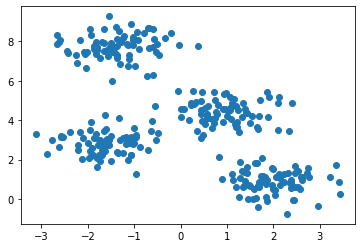

In [3]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.6, random_state=0)

plt.scatter(X[:, 0], X[:, 1]);


Mas, como o computador pode identificar estes grupos? É isso que o algoritmo responde!

Uma vez determinado o número k de clusters, podemos construir nosso modelo!

### Construindo o modelo

Note que temos apenas as **features** dos dados (no caso, $x_1$ e $x_2$). Iso caracteriza um problema de clusterização **não-supervisionado**: quando nossos dados **não têm targets**, apenas features!

A classe do k-means no sklearn esta aqui: [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Temos vários argumentos na classe, mas os principais são:

>- n_clusters: quantos clusters queremos (o número k);

>- max_iter: é o número máximos de iterações que o algoritmo fará, se ele não convergir antes disso. É uma boa ideia não colocar um número tão grande, ou o algoritmo pode ficar bem lento. Algo da ordem de 1000, em geral é uma boa escolha.

Em algoritmos **não supervisionados**, não existe a divisão em dados de treino e dados de teste, porque **não há o que testar!**. Queremos apenas **econtrar estrutura** nos dados!

Então, basta fitar o modelo com nossos dados todos (no caso, o array X)

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(X)

In [5]:
kmeans

KMeans(n_clusters=4)

Agora que o modelo está treinado, podemos fazer predições:


In [6]:
kmeans.labels_

array([3, 0, 2, 0, 3, 3, 1, 2, 0, 0, 1, 0, 2, 0, 3, 2, 2, 3, 1, 1, 3, 3,
       2, 1, 1, 2, 3, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 3, 2, 1, 2, 2,
       1, 1, 0, 1, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 0, 3, 0, 2, 0, 1, 1, 1,
       0, 3, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 3, 0, 3, 2, 3, 3, 0, 2, 3, 2,
       0, 0, 2, 3, 0, 1, 1, 2, 3, 3, 2, 1, 0, 3, 0, 3, 2, 3, 3, 2, 0, 2,
       1, 1, 3, 0, 3, 2, 0, 3, 3, 2, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 0, 1,
       1, 3, 0, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2,
       3, 1, 0, 1, 3, 2, 0, 2, 2, 3, 2, 1, 1, 2, 3, 2, 2, 0, 3, 2, 1, 0,
       3, 3, 2, 1, 3, 2, 1, 1, 2, 2, 2, 2, 3, 0, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 0, 2, 1, 3, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1, 3, 3, 2,
       0, 3, 3, 1, 3, 1, 2, 0, 0, 2, 2, 0, 2, 3, 1, 2, 3, 1, 0, 1, 3, 2,
       3, 0, 0, 0, 0, 1, 1, 0, 2, 1, 3, 2, 1, 1, 1, 3, 3, 0, 2, 2, 1, 3,
       0, 1, 2, 0, 2, 3, 3, 1, 1, 2, 3, 3, 3, 2, 0, 0, 3, 3, 2, 3, 3, 3,
       0, 1, 0, 2, 3, 3, 0, 0, 0, 3, 3, 2, 0, 1])

In [7]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3])

In [8]:
kmeans.predict(X)

array([3, 0, 2, 0, 3, 3, 1, 2, 0, 0, 1, 0, 2, 0, 3, 2, 2, 3, 1, 1, 3, 3,
       2, 1, 1, 2, 3, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 3, 2, 1, 2, 2,
       1, 1, 0, 1, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 0, 3, 0, 2, 0, 1, 1, 1,
       0, 3, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 3, 0, 3, 2, 3, 3, 0, 2, 3, 2,
       0, 0, 2, 3, 0, 1, 1, 2, 3, 3, 2, 1, 0, 3, 0, 3, 2, 3, 3, 2, 0, 2,
       1, 1, 3, 0, 3, 2, 0, 3, 3, 2, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 0, 1,
       1, 3, 0, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2,
       3, 1, 0, 1, 3, 2, 0, 2, 2, 3, 2, 1, 1, 2, 3, 2, 2, 0, 3, 2, 1, 0,
       3, 3, 2, 1, 3, 2, 1, 1, 2, 2, 2, 2, 3, 0, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 0, 2, 1, 3, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1, 3, 3, 2,
       0, 3, 3, 1, 3, 1, 2, 0, 0, 2, 2, 0, 2, 3, 1, 2, 3, 1, 0, 1, 3, 2,
       3, 0, 0, 0, 0, 1, 1, 0, 2, 1, 3, 2, 1, 1, 1, 3, 3, 0, 2, 2, 1, 3,
       0, 1, 2, 0, 2, 3, 3, 1, 1, 2, 3, 3, 3, 2, 0, 0, 3, 3, 2, 3, 3, 3,
       0, 1, 0, 2, 3, 3, 0, 0, 0, 3, 3, 2, 0, 1])

In [9]:
clusters_labels = kmeans.labels_

clusters_labels

array([3, 0, 2, 0, 3, 3, 1, 2, 0, 0, 1, 0, 2, 0, 3, 2, 2, 3, 1, 1, 3, 3,
       2, 1, 1, 2, 3, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 3, 2, 1, 2, 2,
       1, 1, 0, 1, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 0, 3, 0, 2, 0, 1, 1, 1,
       0, 3, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 3, 0, 3, 2, 3, 3, 0, 2, 3, 2,
       0, 0, 2, 3, 0, 1, 1, 2, 3, 3, 2, 1, 0, 3, 0, 3, 2, 3, 3, 2, 0, 2,
       1, 1, 3, 0, 3, 2, 0, 3, 3, 2, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 0, 1,
       1, 3, 0, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2,
       3, 1, 0, 1, 3, 2, 0, 2, 2, 3, 2, 1, 1, 2, 3, 2, 2, 0, 3, 2, 1, 0,
       3, 3, 2, 1, 3, 2, 1, 1, 2, 2, 2, 2, 3, 0, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 0, 2, 1, 3, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1, 3, 3, 2,
       0, 3, 3, 1, 3, 1, 2, 0, 0, 2, 2, 0, 2, 3, 1, 2, 3, 1, 0, 1, 3, 2,
       3, 0, 0, 0, 0, 1, 1, 0, 2, 1, 3, 2, 1, 1, 1, 3, 3, 0, 2, 2, 1, 3,
       0, 1, 2, 0, 2, 3, 3, 1, 1, 2, 3, 3, 3, 2, 0, 0, 3, 3, 2, 3, 3, 3,
       0, 1, 0, 2, 3, 3, 0, 0, 0, 3, 3, 2, 0, 1])

In [10]:
"x1 x2".split()

['x1', 'x2']

In [11]:
pd.DataFrame(X, columns="x1 x2".split())

,x1,x2
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542
...,...,...
295,1.973698,1.579798
296,2.518342,1.391766
297,0.438990,4.535929
298,0.369479,7.791105


In [12]:
pd.Series(clusters_labels, name="labels")

0      3
1      0
2      2
3      0
4      3
      ..
295    3
296    3
297    2
298    0
299    1
Name: labels, Length: 300, dtype: int32

In [13]:
df_result = pd.concat([pd.DataFrame(X, columns="x1 x2".split()),
                       pd.Series(clusters_labels, name="labels")], axis=1)

In [14]:
df_result

,x1,x2,labels
0,0.836857,2.136359,3
1,-1.413658,7.409623,0
2,1.155213,5.099619,2
3,-1.018616,7.814915,0
4,1.271351,1.892542,3
...,...,...,...
295,1.973698,1.579798,3
296,2.518342,1.391766,3
297,0.438990,4.535929,2
298,0.369479,7.791105,0


In [15]:
df_result[df_result["labels"] == 0]

,x1,x2,labels
1,-1.413658,7.409623,0
3,-1.018616,7.814915,0
8,-0.204932,8.432097,0
9,-0.711100,8.660438,0
11,-2.670008,8.353891,0
...,...,...,...
288,-1.326888,8.515308,0
292,-1.120168,7.110316,0
293,-1.655071,8.614167,0
294,-1.275678,7.967765,0


In [16]:
df_result.query("labels == 0")

,x1,x2,labels
1,-1.413658,7.409623,0
3,-1.018616,7.814915,0
8,-0.204932,8.432097,0
9,-0.711100,8.660438,0
11,-2.670008,8.353891,0
...,...,...,...
288,-1.326888,8.515308,0
292,-1.120168,7.110316,0
293,-1.655071,8.614167,0
294,-1.275678,7.967765,0


Isto retorna uma lista com número de elementos igual ao número de pontos do dataset, e com valores entre 0 e k-1, indicando qual é o número do cluster (a contagem começa com zero). 

No nosso caso, como k = 4, teremos os clusters 0, 1, 2 e 3.

Pra visualizarmos os clusters, basta plotar os dados iniciais com o hue adequado!

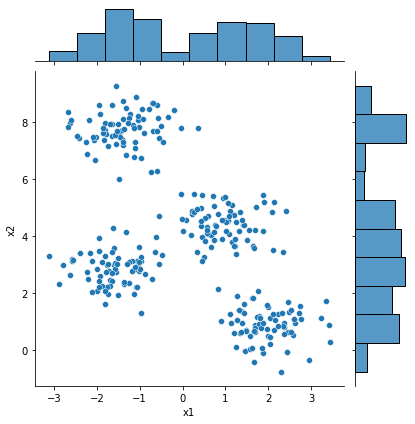

In [17]:
sns.jointplot(data=df_result, x="x1", y="x2");

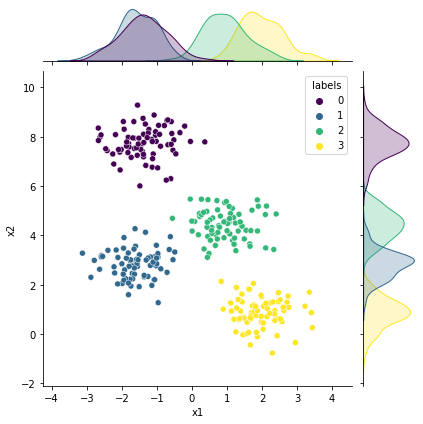

In [18]:
sns.jointplot(data=df_result, x="x1", y="x2", hue="labels", palette="viridis");

Na prática, a análise segue de maneira qualitativa, inspecionando os clusters individuais:

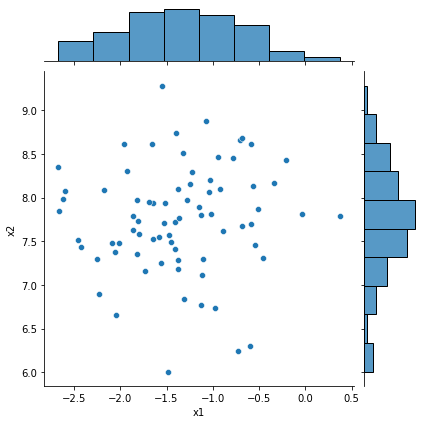

In [19]:
sns.jointplot(data=df_result.query("labels == 0"), x="x1", y="x2");

In [20]:
df_result.query("labels == 0").describe()

,x1,x2,labels
count,75.000000,75.000000,75.0
mean,-1.373244,7.753689,0.0
std,0.646340,0.620917,0.0
min,-2.670008,6.007774,0.0
25%,-1.810613,7.424574,0.0
50%,-1.381819,7.788747,0.0
75%,-0.962514,8.117878,0.0
max,0.369479,9.282932,0.0


_____

### Determinando o $k$

Mas e se não for tão fácil de plotar os dados para determinar o $k$?

Pode ser que não consigamos visualizar nossos dados em 2D, se, por exemplo, tivermos mais de 2 features em nossos dados...

> Quase sempre, uma boa metodologia para a determinaçãodo número de clusters é **conhecimento do negócio**! Muitas vezes, o próprio problema nos indica a quantidade de clusters que esperamos encontrar!

No entanto, há situações em que o número de clusters não é conhecido a priori.

Existem alguns métodos mais quantitativos que podem ser utilizados na determinação do número de clusters pelo k-means. Vamos estudá-los agora!

### Inércia (WCSS) e método do cotovelo

A inércia também é chamada de **WCSS** (Within-Cluster-Sum-of-Squares), isto é, "soma de quadrados intra-cluster", que é calculada como a soma das distâncias (ao quadrado) entre os pontos e os centróides dos clusters.

Quanto menor o WCSS, mais eficiente foi a clusterização, **mas até certo ponto!**

Conforme o número de clusters ($k$) aumenta, o WCSS diminui, sendo mínimo quando cada ponto é seu próprio cluster isolado (o que não é nada útil, pois se cada ponto for um cluster, não há clusterização alguma!).

Assim, o que queremos não é encontrar um $k$ que minimize o WCSS, mas sim um k a partir do qual o WCSS **para de decrescer tão rapidamente!**

Quando encontramos este $k$, encontramos o número ideal de clusters!

Ao plotarmos o WCSS (inércia) em função de $k$, o que buscaremos será então o valor de $k$ após o qual **o gráfico deixa de ser tão inclinado**. Esses pontos são visualizados como "quinas", ou **cotovelos** no gráfico -- e daí vem o nome do método!

Para aplicar o método, fazemos:
 

In [21]:
kmeans.inertia_

212.00599621083478

In [26]:
def calc_inercias(X, lista_k, plot=True):
    
    lista_inercias = []

    for k in lista_k:

        kmeans = KMeans(n_clusters=k).fit(X)

        clusters_labels = kmeans.labels_

        df_result = pd.concat([pd.DataFrame(X, columns="x1 x2".split()),
                               pd.Series(clusters_labels, name="labels")], axis=1)

        inercia = kmeans.inertia_

        if plot:
            print(f"Clusterização com {k} cluster(s); Inércia de: {inercia}")

            sns.jointplot(data=df_result, x="x1", y="x2", hue="labels", palette="viridis")
            plt.show()

        lista_inercias.append(inercia)
        
    return lista_inercias

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clusterização com 1 cluster(s); Inércia de: 2812.1375953032334


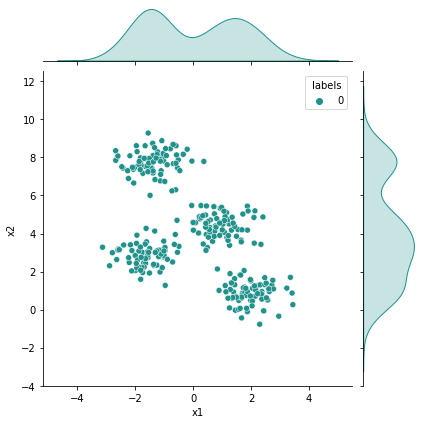

Clusterização com 2 cluster(s); Inércia de: 1190.7823593643448


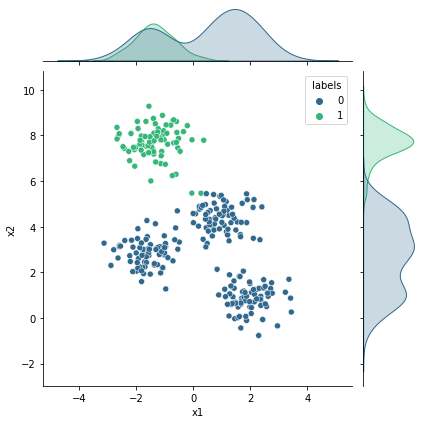

Clusterização com 3 cluster(s); Inércia de: 546.8911504626299


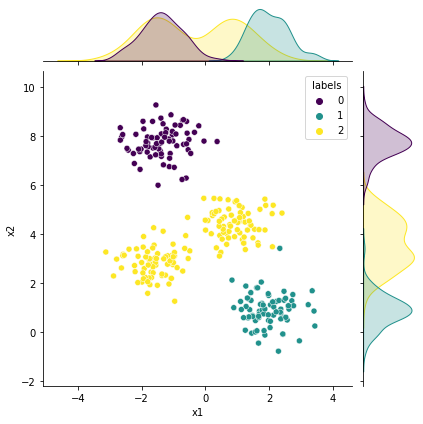

Clusterização com 4 cluster(s); Inércia de: 212.00599621083478


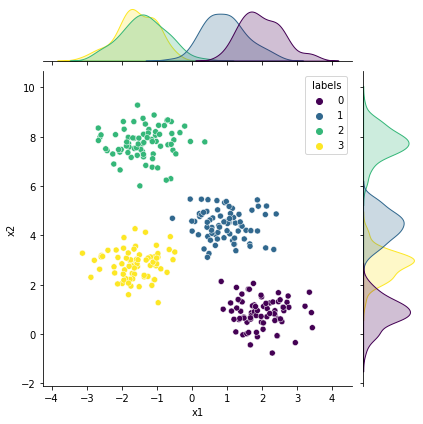

Clusterização com 5 cluster(s); Inércia de: 188.77323556773723


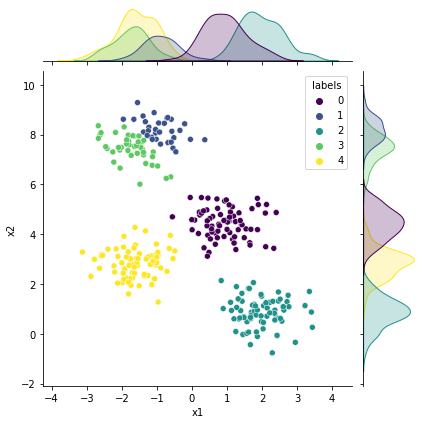

Clusterização com 6 cluster(s); Inércia de: 171.21838726595152


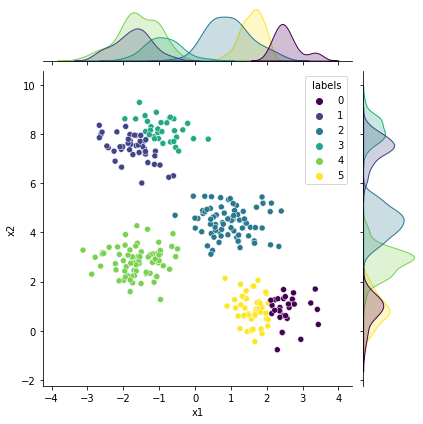

Clusterização com 7 cluster(s); Inércia de: 153.37718934983434


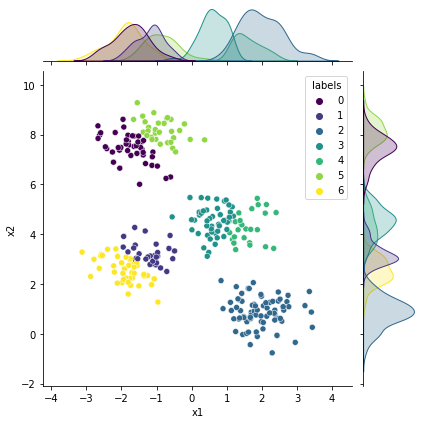

Clusterização com 8 cluster(s); Inércia de: 136.09888746441183


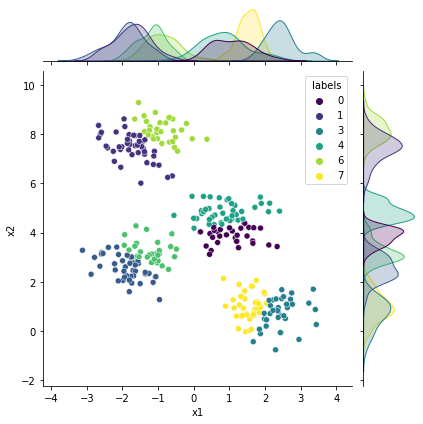

Clusterização com 9 cluster(s); Inércia de: 124.60214487759211


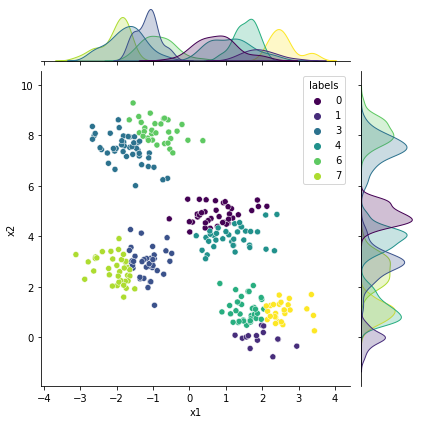

Clusterização com 10 cluster(s); Inércia de: 112.27249990327321


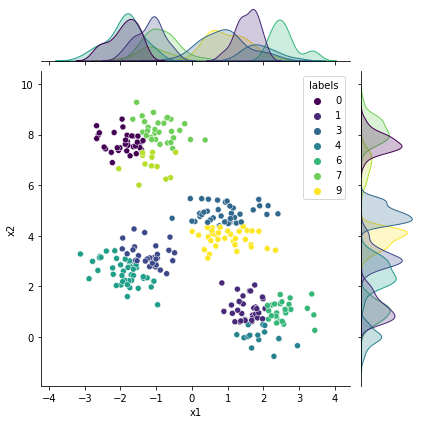

In [27]:
lista_inercias = calc_inercias(X, range(1, 11), plot=True)

Vamos criar uma função única para o cálculo e plot do método do cotovelo:

In [30]:
def calc_plot_cotovelo(X, lista_k, plot_varios_k=True):    
    
    lista_inercias = calc_inercias(X, lista_k, plot=plot_varios_k)
    
    plt.figure(figsize=(8, 5))

    plt.title("Método do cotovelo")

    plt.plot(lista_k, lista_inercias, marker="o")

    plt.xlabel("k (número de clusters)")
    plt.ylabel("Inércia (WCSS)")

    plt.show()

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


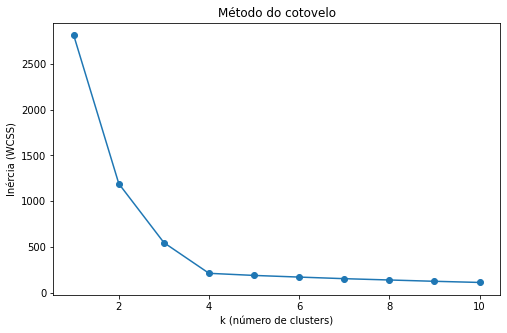

In [31]:
calc_plot_cotovelo(X, range(1, 11), plot_varios_k=False)

O valor de $k$ mais adequado é aquele em que o gráfico tem uma "quina" bem abrupta: no exemplo acima, $k = 4$, como já sabíamos!

_______

### Método da silhueta

Um método alternativo ao método do cotovelo para o cálculo do número adequado de clusters é o método da silhueta.

Neste método, é calculado para cada ponto um score conhecido como **coeficiente de silhueta**, que é dado por:

$$ s = \frac{b - a}{max(a, b)} $$

onde:

- $a$ é a **distância média entre um dado ponto e os pontos de seu próprio cluster**. Portanto, essa é uma medida de **similaridade entre um ponto e seu cluster**;
- $b$ é a **distância média entre um dado ponto e os pontos do cluster mais próximo (sem ser o próprio).** Portanto, essa é uma medida de **dissimilaridade entre um ponto e os demais clusters**;

Graficamente:

<img src=https://miro.medium.com/max/712/1*cUcY9jSBHFMqCmX-fp8BvQ.jpeg width=400>

Note que $-1 < s < 1$, sendo mais próximo de $1$ quando um ponto está no cluster correto ($a \ll b$); e mais próximo de $-1$ quando um ponto está no custer errado ($b \gg a$).

Na prática, é costumeiro olhar para **a média do coeficiente $s$ para todos os pontos, denotado $\bar{s}$**, e apresentar uma única métrica. A ideia é que se, em média, tivermos pontos em clusters corretos, teremos $\bar{s} \rightarrow 1$; enquanto, se em média tivermos muitos pontos em clusters incorretos, teremos $\bar{s} \rightarrow -1$.

Este score é calculado com a função [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) do sklearn.

Uma vez que é possível calcularmos o score para um dado $k$, a decisão sobre o melhor $k$ segue similar ao método do cotovelo: basta calcular o score de silhueta para vários valores de $k$, e selecionar aquele que dá **a silueta mais próxima de $1$**!

Isto é facilmente feito:

In [34]:
from sklearn.metrics import silhouette_score

silhouette_score(X, clusters_labels)

0.33452353371926846

In [39]:
def calc_silhueta(X, lista_k, plot=True):
    
    lista_silhuetas = []

    for k in lista_k:

        kmeans = KMeans(n_clusters=k).fit(X)

        clusters_labels = kmeans.labels_

        df_result = pd.concat([pd.DataFrame(X, columns="x1 x2".split()),
                               pd.Series(clusters_labels, name="labels")], axis=1)

        silhueta_media = silhouette_score(X, clusters_labels)

        if plot:
            print(f"Clusterização com {k} cluster(s); Silhueta média de: {silhueta_media}")

            sns.jointplot(data=df_result, x="x1", y="x2", hue="labels", palette="viridis")
            plt.show()

        lista_silhuetas.append(silhueta_media)
        
    return lista_silhuetas

Clusterização com 2 cluster(s); Silhueta média de: 0.5426422297358302


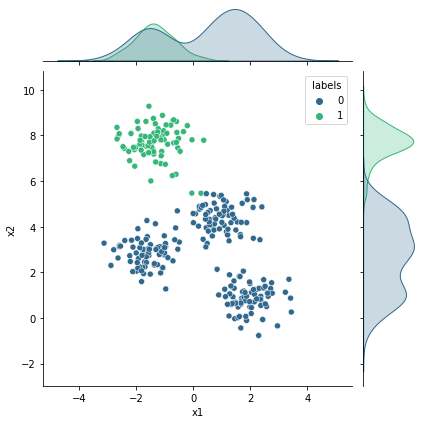

Clusterização com 3 cluster(s); Silhueta média de: 0.5890390393551768


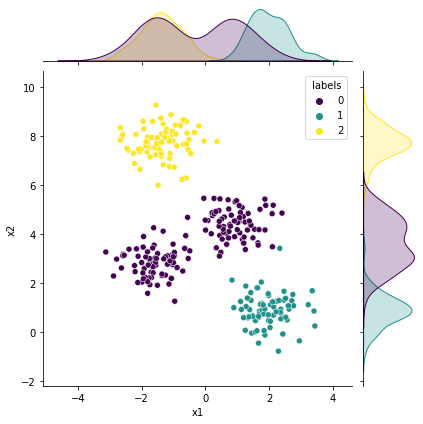

Clusterização com 4 cluster(s); Silhueta média de: 0.6819938690643478


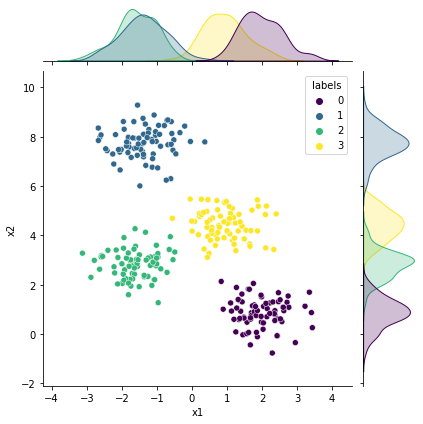

Clusterização com 5 cluster(s); Silhueta média de: 0.5923027677672242


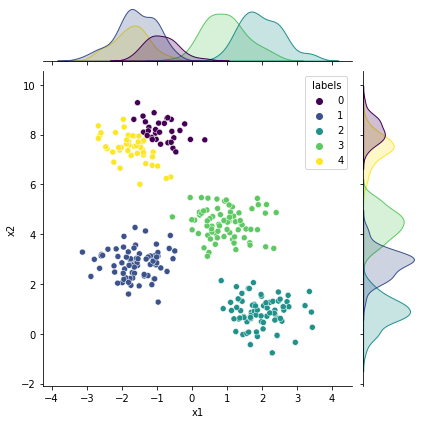

Clusterização com 6 cluster(s); Silhueta média de: 0.49942161501832044


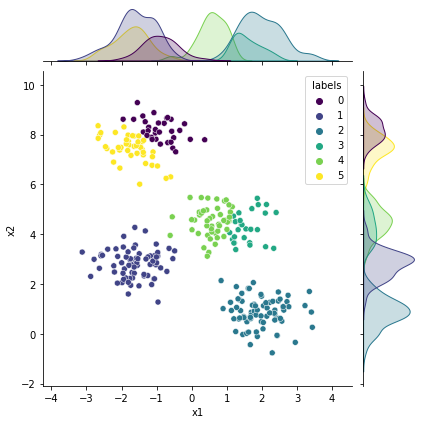

Clusterização com 7 cluster(s); Silhueta média de: 0.4174634339977972


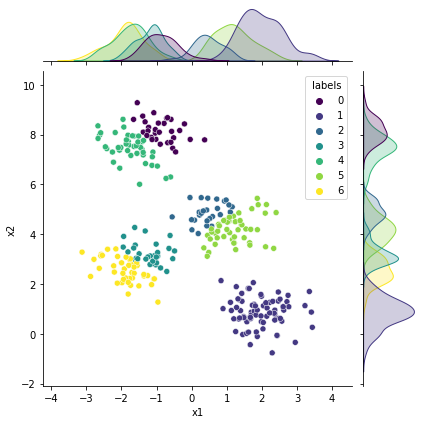

Clusterização com 8 cluster(s); Silhueta média de: 0.32449184261134967


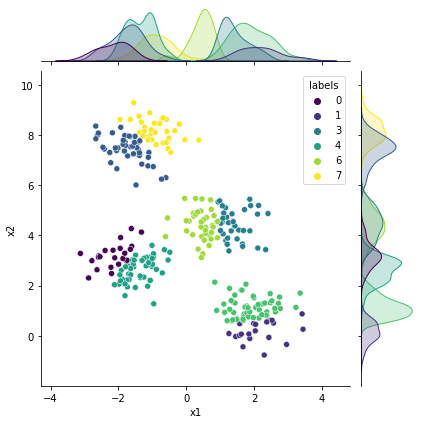

Clusterização com 9 cluster(s); Silhueta média de: 0.326745671312336


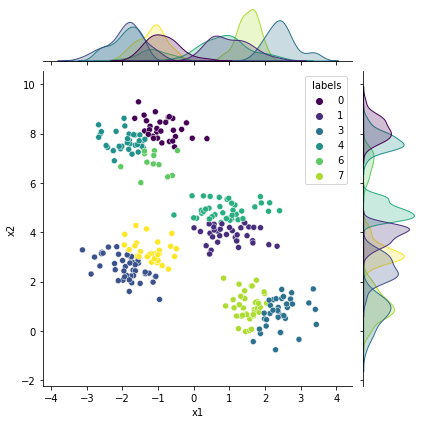

Clusterização com 10 cluster(s); Silhueta média de: 0.34023386865601735


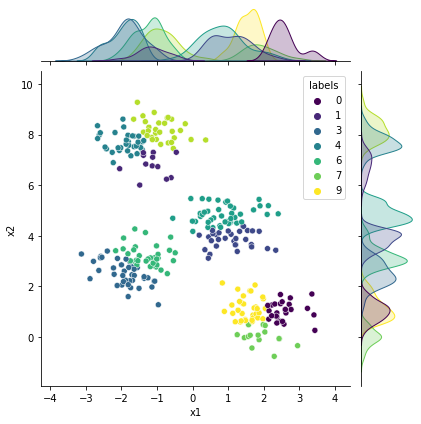

In [40]:
# note que, pra definir a silhueta, temos que ter pelo menos dois clusters!
# (pois, com um cluster só, não dá pra definir o "b")
lista_silhuetas = calc_silhueta(X, range(2, 11), plot=True)

In [41]:
lista_silhuetas

[0.5426422297358302,
 0.5890390393551768,
 0.6819938690643478,
 0.5923027677672242,
 0.49942161501832044,
 0.4174634339977972,
 0.32449184261134967,
 0.326745671312336,
 0.34023386865601735]

In [43]:
def calc_plot_silhueta(X, lista_k, plot_varios_k=True):    
    
    lista_silhuetas = calc_silhueta(X, lista_k, plot=plot_varios_k)
    
    plt.figure(figsize=(8, 5))

    plt.title("Método da silhueta")

    plt.plot(lista_k, lista_silhuetas, marker="o")

    plt.xlabel("k (número de clusters)")
    plt.ylabel("Silhueta média dos pontos")

    plt.show()

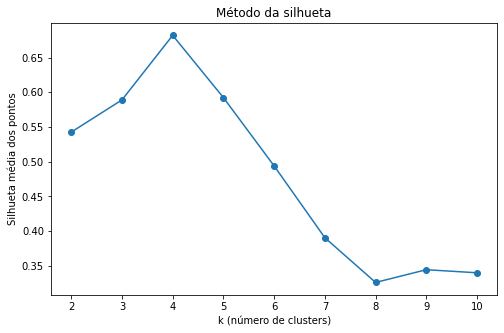

In [44]:
calc_plot_silhueta(X, range(2, 11), plot_varios_k=False)

Aqui novamente, fica claro que o ideal é $k=4$!

Para entender o porquê do método receber o nome "silueta", podemos utilizar o seguinte código do sklearn, [que tirei daqui!](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

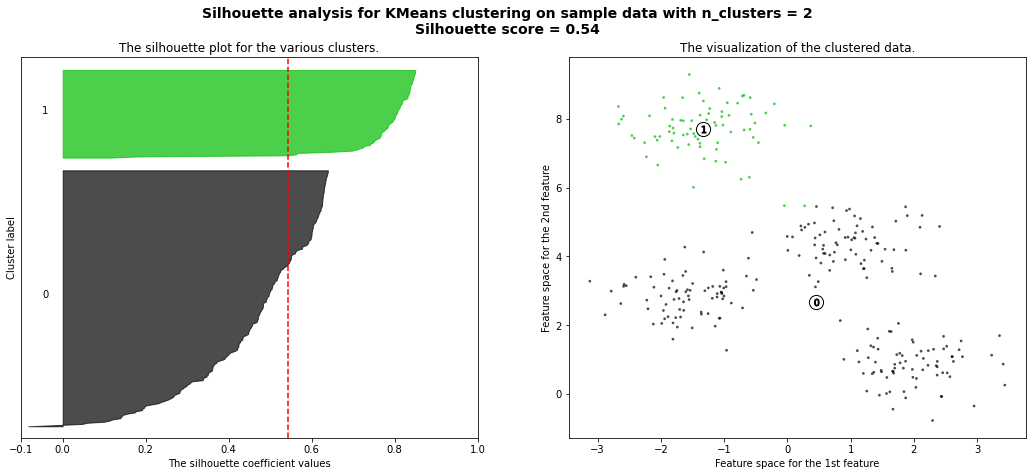

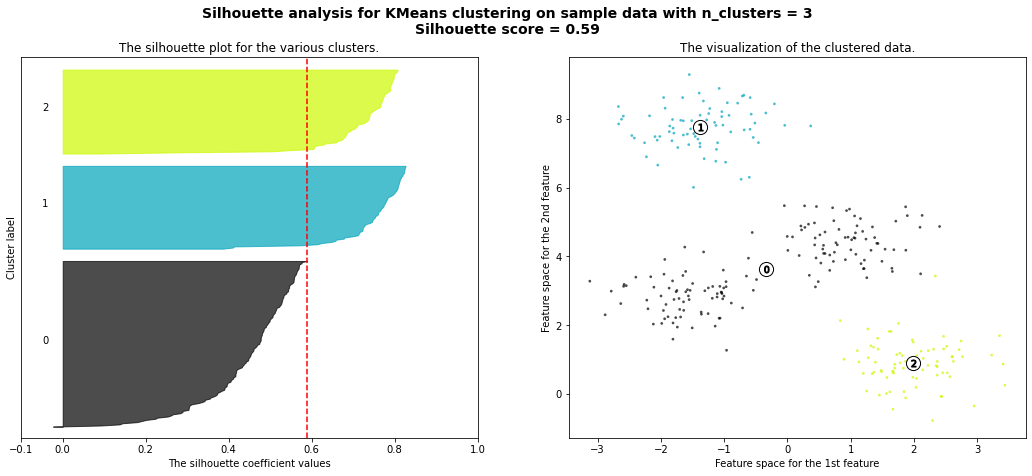

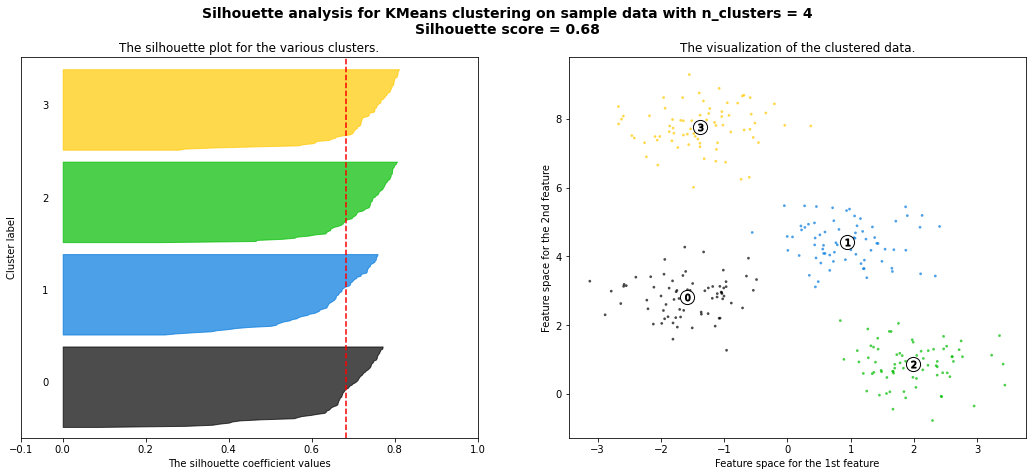

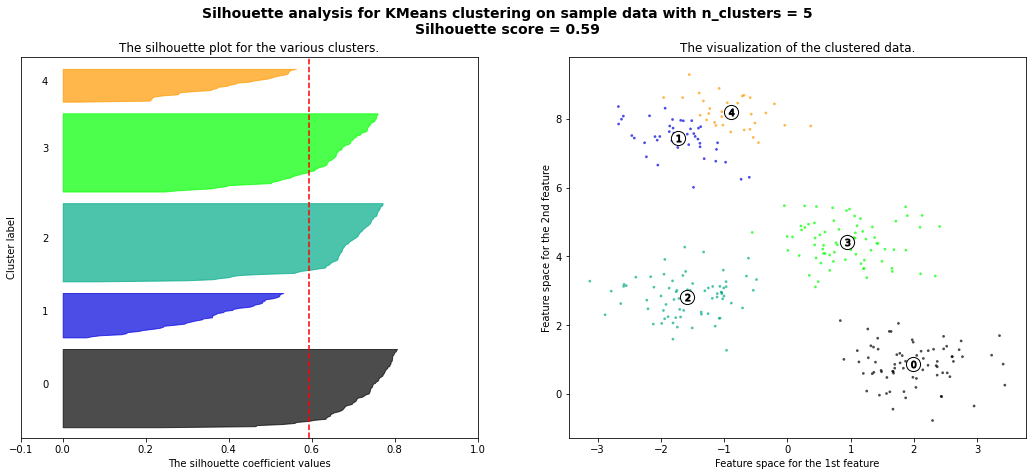

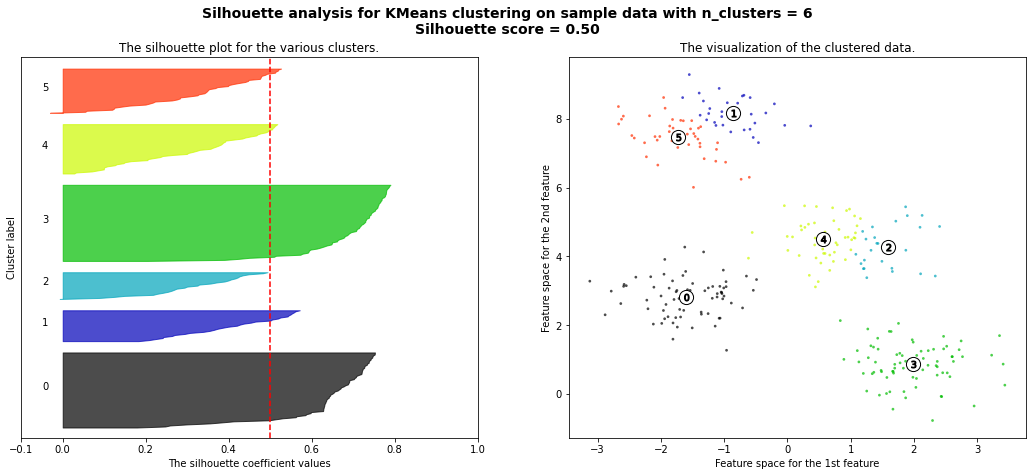

In [45]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    title = "Silhouette analysis for KMeans clustering on sample data "
    title += "with n_clusters = {}\nSilhouette score = {:.2f}".format(n_clusters, silhouette_avg)
    plt.suptitle(title, fontsize=14, fontweight='bold')

    plt.show()
    
    print("\n\n")

Na prática, é recomendável usar ambos os métodos, do cotovelo e da silhueta, pra apoiar a tomada de decisão quanto ao valor adequado de $k$.

No entanto, lembre-se: sempre que possível, guie esta decisão segundo o contexto do problema de negócio!

___

### Vamos fazer um exemplo com mais features

In [53]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, n_features=4, centers=6, cluster_std=1.3, random_state=0)

df_X = pd.DataFrame(X, columns="x1 x2 x3 x4".split())

In [54]:
df_X

,x1,x2,x3,x4
0,1.599232,10.684159,-8.652252,-8.259215
1,9.713831,0.296187,5.224977,-2.283975
2,-9.579730,8.692434,6.460693,8.435917
3,7.609659,-3.092230,5.494362,0.340980
4,1.790641,9.745953,-10.532394,-10.568381
...,...,...,...,...
295,12.856646,8.284069,-0.989091,6.101867
296,2.300922,8.543929,-7.643300,-9.691192
297,-0.627904,3.821056,-2.191532,6.037087
298,1.228685,8.536996,-6.174810,-8.535831


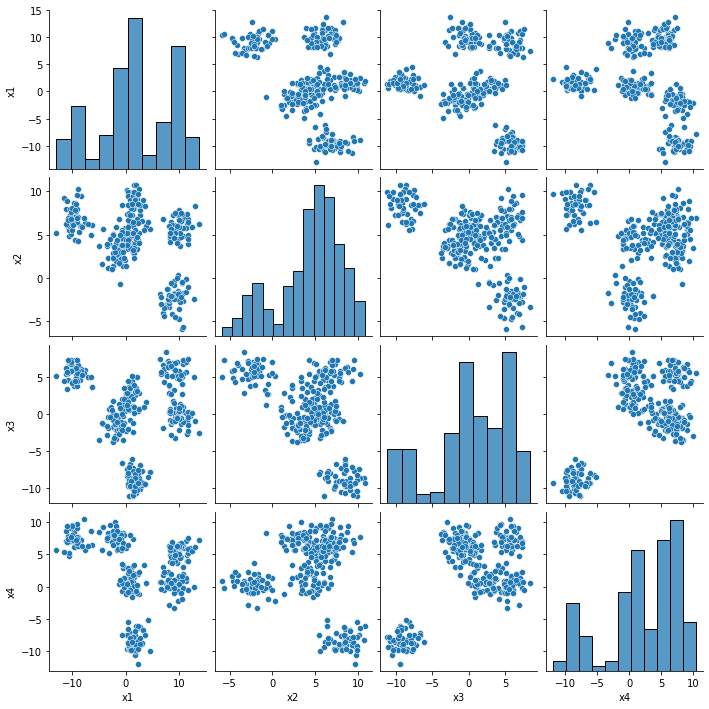

In [55]:
sns.pairplot(data=df_X);

**Conclusão:** muito difícil de escolher o $k$ com base em análise exploratória!

Aí, não tem jeito, temos que utilizar os métodos quantitativos do cotovelo e/ou silhueta!

**Aplicando o método do cotovelo...**

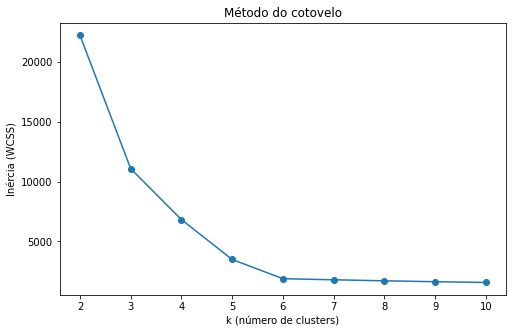

In [56]:
calc_plot_cotovelo(df_X, range(2, 11), plot_varios_k=False)

**Aplicando o método da silhueta...**

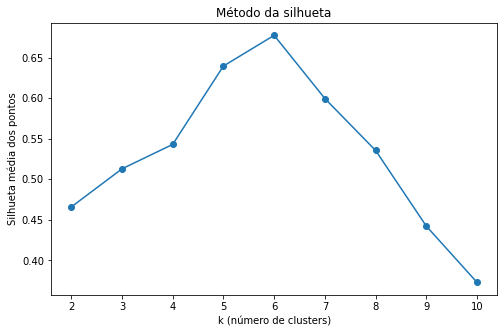

In [57]:
calc_plot_silhueta(df_X, range(2, 11), plot_varios_k=False)

**Vamos tentar separadamente $k=6$**

In [58]:
kmeans = KMeans(n_clusters=6).fit(df_X)

clusters_labels = kmeans.labels_

df_result = pd.concat([df_X,
                       pd.Series(clusters_labels, name="labels")], axis=1)

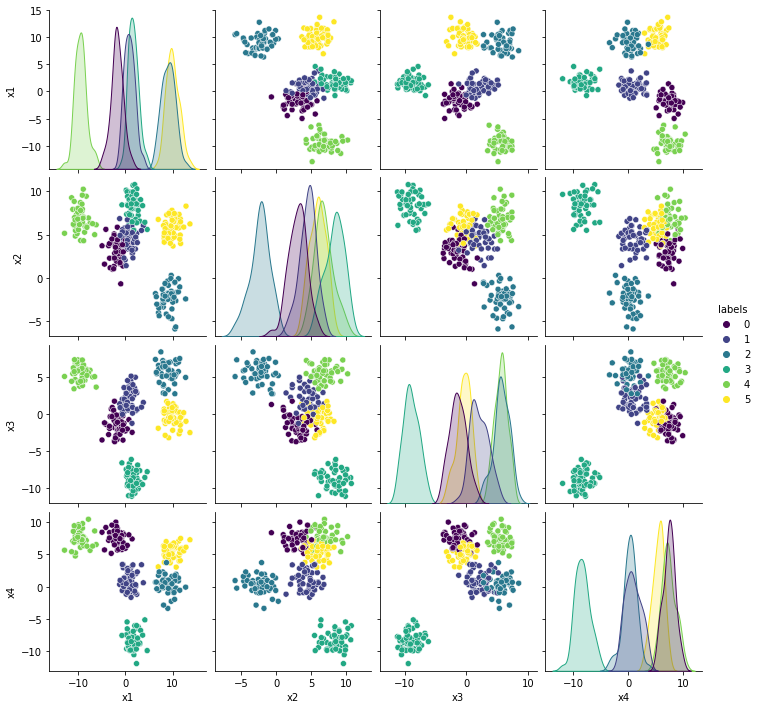

In [66]:
sns.pairplot(data=df_result, hue="labels", palette="viridis");

In [68]:
df_result.query("labels==0").describe()

,x1,x2,x3,x4,labels
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,-1.813886,3.035982,-1.410873,7.487594,0.0
std,1.266888,1.278802,1.327344,1.082217,0.0
min,-4.983828,-0.686488,-3.765420,5.144479,0.0
25%,-2.419849,2.249394,-2.189585,6.810532,0.0
50%,-1.785316,3.081068,-1.542567,7.491081,0.0
75%,-0.981612,3.817726,-0.389455,8.237726,0.0
max,1.410198,5.851623,1.746836,9.991030,0.0


In [69]:
df_result.query("labels==1").describe()

,x1,x2,x3,x4,labels
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,0.810301,4.502479,2.064333,0.918231,1.0
std,1.123484,1.184829,1.434922,1.426714,0.0
min,-1.241881,1.413363,-1.263619,-1.677372,1.0
25%,-0.066770,3.786098,0.954464,-0.132218,1.0
50%,0.738074,4.683562,2.018670,0.699645,1.0
75%,1.497255,5.214214,3.072769,2.050387,1.0
max,3.788477,6.839795,5.153356,3.424371,1.0


As projeções em duas dimensões mostram que $k=6$ de fato é a melhor escolha! (O que faz sentido, pois nossos dados artificiais foram preparados para conter 6 clusters!)

____

### **Quando uso algoritmos de clusterização, e em que casos eles não são uma boa ideia?**


De certa fora, algoritmos de clusterização podem ser vistos como classificadores, uma vez que os clusters podem caracterizar um grupo, ou uma classe.

No entanto, há uma diferença bem importante entre problemas de classificação e clusterização:

- **Problemas de classificação** são **supervisionados**, isto é, as amostras de treino que utilizamos têm tanto as features como os **targets**. Em outras palavras, neste tipo de problema, sabemos de antemão quais são as classes de interesse - Isto é, temos $\{\vec{x}_i, y_i \}_{i=1}^N$; <br><br>

- **Problemas de clusterização**, por outro lado, são **não-supervisionados**. Ou seja, a amostra **não contêm** targets, temos apenas as features! O nosso objetivo é justamente descobrir **alguma estrutura de agrupamento** nos dados, mas sem qualquer informação prévia quanto aos grupos a serem formados.

Foi exatamente o caso do nosso exemplo: nós tínhamos apenas as **features** dos dados, e **nenhuma** informação quanto aos grupos que seriam formados.

Foi só depois que fizemos a análise exploratória dos dados (plot), que pudemos identificar alguma estrutura (4 clusters), para então aplicar o k-means!

No segundo caso, só pudemos determinar o número de clusters de forma segura utilizando o **método do cotovelo**.

Assim sendo, via de regra, a utilização ou não de algoritmos de clusterização, além do tipo de problema, depende dos **dados disponíveis**!

Além do k-means, há outros algoritmos de clusterização que são muito utilizados, e que se baseiam em princípios bem diferentes do k-means.

Na aula que vem, olharemos para um algoritmo bem importante: [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN).

____
____
____